## Desempenho dos alunos nos exames

Fonte: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

### Contexto

Esse dataset consiste nas notas obtidas pelos alunos em diversas disciplinas, além de dados adicionais de raça, etnia, nível escolar dos pais, etc. 

### Variáveis

* <b>gender</b>: gênero
* <b>race/ethnicity</b>: raça/etnia
* <b>parental level of education</b>: nível de escolaridade dos pais
* <b>lunch</b>: ter almoçado antes do teste
* <b>test preparation course</b>: completou ou não curso preparatório antes do teste 
* <b>math score</b>: pontuação de matemática
* <b>reading score</b>: pontuação de leitura
* <b>writing score</b>: pontuação de escrita

### Importar pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Leitura dos dados

In [2]:
df = pd.read_csv('../data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Análise Exploratória

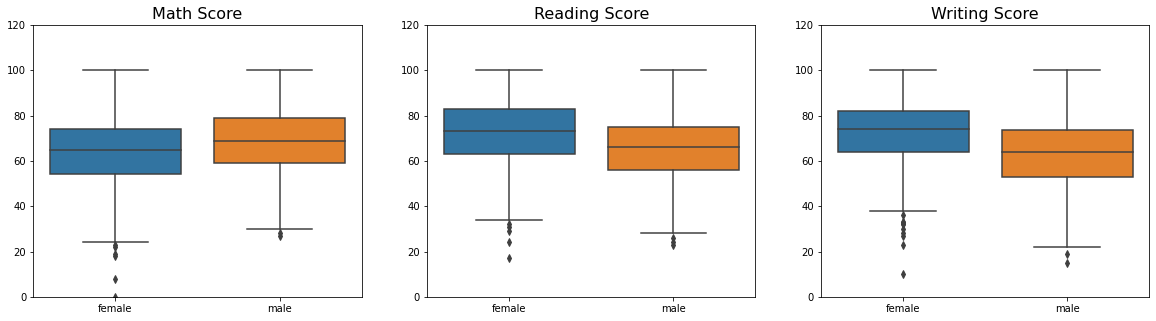

In [25]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.boxplot(data=df, x="gender", y="math score")
plt.xlabel('')
plt.ylabel('')
plt.title('Math Score', fontsize=16)
plt.ylim(0,120)

plt.subplot(1,3,2)
sns.boxplot(data=df, x="gender", y="reading score")
plt.xlabel('')
plt.ylabel('')
plt.title('Reading Score', fontsize=16)
plt.ylim(0,120)

plt.subplot(1,3,3)
sns.boxplot(data=df, x="gender", y="writing score")
plt.xlabel('')
plt.ylabel('')
plt.title('Writing Score', fontsize=16)

plt.ylim(0,120)

plt.show()

As mulheres tiveram notas maiores em leitura e escrita, enquanto homens tiveram notas maiores em matemática.

* Média do score de cada disciplina por grupo de etnia

In [48]:
df_etnia = df.groupby('race/ethnicity')[['math score','reading score','writing score']].mean()
df_etnia    

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


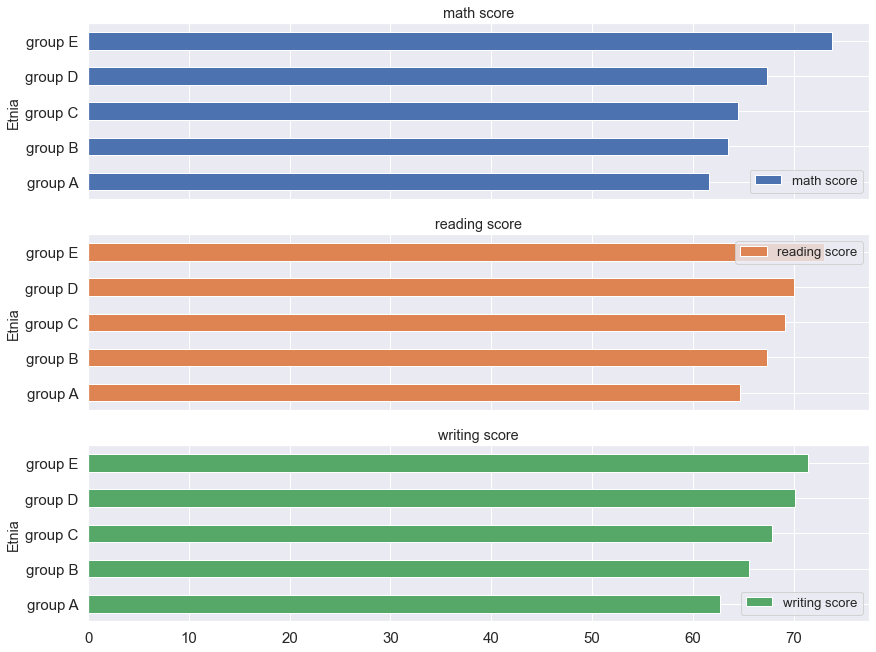

In [59]:
df_etnia.plot(subplots=True, kind='barh', figsize=(14,11), fontsize=15, sharey=True, xlabel='Etnia');

* Quantidade de pessoas do sexo masculino e feminino por raça

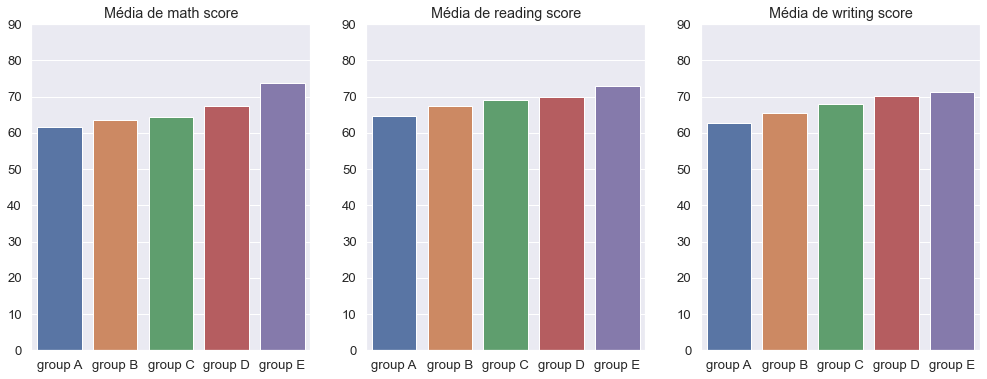

In [74]:
fig, ax = plt.subplots(figsize=(17,6))

for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = df.groupby("race/ethnicity")[list(df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=0)
    plt.ylim(0,90)
    plt.title("Média de " + list(df.columns[-3:])[idx])
plt.show()

* Quantidade de pessoas por grupo de etnia

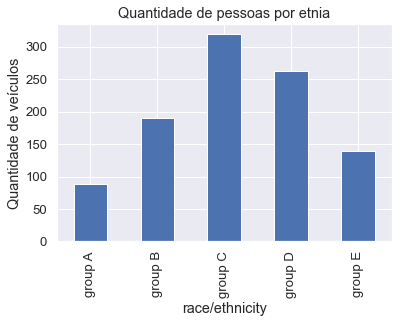

In [75]:
df.groupby('race/ethnicity')['gender'].count().plot(kind='bar', title='Quantidade de pessoas por etnia', legend=None, ylabel='Quantidade de pess');